# Comparison each of the techniques of Matrix Factorization such as:
# Truncated Singular Value Decomposition (TSVD) and rincipal Component Analysis (PCA) # 

# with the following three algorithms such as: 
# K Nearest Neighbours (KNN),Linear Regression (LR) and Naive Bayesian regression (NB) using modeling contextual information on model-based Collaborative #

# -------------Content of this program--------------------



1) Exploratoration of Data

2) Analyse of Data

3) Matrix Factorization TSVD

4) Matrix Factorization PCA 

5) KNN Algorithm and Model Evaluation 

6) Linear Regression and Model Evaluation 

7) Naive Bayesian and Model Evaluation 
8) Final Result


#                # --------------__1) EXploration of data_____________--------------------
           1.1) Importing Various Modules

In [197]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualization and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error

from math import*
from decimal import Decimal

In [198]:
df = pd.read_csv("comoda_data.csv")   #import and read LDOS_CoMoDa.csv dataset

df

,userID,itemID,rating,age,sex,city,country,time,daytype,season,...,movieCountry,movieLanguage,movieYear,genre1,genre2,genre3,actor1,actor2,actor3,budget
0,23,14,5,33,1,20,2,3,2,2,...,36,9,2007,7,-1,-1,1303,1524,1656,9000000
1,21,5,3,28,1,10,3,2,2,2,...,37,9,1998,7,6,10,1636,1539,1402,90000000
2,21,6,4,28,1,10,3,4,2,2,...,37,9,2008,7,10,18,1373,1510,1691,24000000
3,22,13,4,28,1,20,2,3,2,3,...,37,9,2010,1,14,19,1382,57,1109,60000000
4,21,7,3,28,1,10,3,4,2,2,...,37,9,2003,3,10,18,98,385,1827,35000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,31,4324,4,30,2,20,2,2,2,2,...,36,9,2011,1,3,8,1623,1008,1458,125000000
2292,61,177,5,28,1,20,2,4,3,2,...,37,9,1979,1,3,21,1340,826,467,-1
2293,125,177,5,23,2,3,5,4,3,2,...,37,9,1979,1,3,21,1340,826,467,-1
2294,21,4288,2,28,1,10,3,2,2,2,...,37,9,2012,1,10,19,895,1002,1179,78000000


In [199]:
df.shape #the shape of dataset dimension

(2296, 30)

In [200]:
#dataset has 2296 rows and 30 columns

In [201]:
#user's sex (1=male, 2= female)
df[df['sex'] == 1].head()  #selecting rows based on conditionals user's male


,userID,itemID,rating,age,sex,city,country,time,daytype,season,...,movieCountry,movieLanguage,movieYear,genre1,genre2,genre3,actor1,actor2,actor3,budget
0,23,14,5,33,1,20,2,3,2,2,...,36,9,2007,7,-1,-1,1303,1524,1656,9000000
1,21,5,3,28,1,10,3,2,2,2,...,37,9,1998,7,6,10,1636,1539,1402,90000000
2,21,6,4,28,1,10,3,4,2,2,...,37,9,2008,7,10,18,1373,1510,1691,24000000
3,22,13,4,28,1,20,2,3,2,3,...,37,9,2010,1,14,19,1382,57,1109,60000000
4,21,7,3,28,1,10,3,4,2,2,...,37,9,2003,3,10,18,98,385,1827,35000000


In [202]:
#Finding the Maximum, Minimum, Mean and Count of a rating

print('Maximum of rating:', df['rating'].max())    #the maximum of rating is 5
print('Minimum of rating:', df['rating'].min())    #the minimimg of rating is 1
print('Mean of rating:', df['rating'].mean())  #the mean value of rating is 3.8327
print('Sum:', df['rating'].sum())
print('Count the Rating:', df['rating'].count())   # all the ratings are 2296



Maximum of rating: 5
Minimum of rating: 1
Mean of rating: 3.832752613240418
Sum: 8800
Count the Rating: 2296


In [203]:
n_users = df['userID'].unique()  #users array
n_users

array([ 23,  21,  22,  20,  15,  26,  27,  28,  29,  30,  31,  33,  34,
        35,  37,  38,  39,  40,  25,  41,  42,  43,  45,  47,  48,  49,
        50, 157,  52,  53,  54,  24,  55,  56,  57,  59,  60,  61,  62,
        63,  64,  91,  71,  72,  73,  75,  79,  82,  83,  85,  86,  87,
        88,  89,  93,  96,  99, 100, 103, 104, 105, 108, 112, 122, 123,
       125, 126, 127, 131, 132, 134, 138, 140, 141, 143, 145, 147, 148,
       149, 150, 152, 144, 156, 161, 167, 171, 179, 188, 191, 190, 193,
       197, 196, 199, 200, 201, 207, 202, 209, 211, 213, 214, 220, 221,
       225, 228, 230, 239, 241, 243, 244, 195, 248, 251, 252, 253, 254,
       257, 264, 245, 268], dtype=int64)

In [204]:
n_users = len( n_users) #number of each users, 121 users
n_users
    

121

In [205]:
n_items = df['itemID'].unique()  #items array
n_items

array([  14,    5,    6, ..., 4378, 4380, 4381], dtype=int64)

In [206]:
n_items = len(n_items) #number of each items, 1232 users
n_items

1232

In [207]:
n_rating = len(df['rating'])  #number of ratings
n_rating

2296

In [208]:
df['sex'].value_counts()   #count the numbers of male and females


1    1164
2    1132
Name: sex, dtype: int64

In [209]:
df.describe().T  #description of dataset to show if there a missing value -1   (yes there exist a missing value -1)

,count,mean,std,min,25%,50%,75%,max
userID,2296.0,6.943641e+01,6.233474e+01,15.0,27.00,50.0,75.00,268.0
itemID,2296.0,2.774027e+03,1.693017e+03,1.0,223.00,3691.5,4004.00,4381.0
rating,2296.0,3.832753e+00,1.058172e+00,1.0,3.00,4.0,5.00,5.0
age,2296.0,2.572735e+01,2.116771e+01,-1.0,25.00,28.0,28.00,900.0
sex,2296.0,1.493031e+00,5.000603e-01,1.0,1.00,1.0,2.00,2.0
city,2296.0,1.347082e+01,6.612988e+00,1.0,10.00,10.0,20.00,22.0
country,2296.0,2.888502e+00,1.055220e+00,1.0,2.00,3.0,3.00,5.0
time,2296.0,2.731707e+00,1.143844e+00,-1.0,2.00,3.0,3.00,4.0
daytype,2296.0,1.554007e+00,8.456741e-01,-1.0,1.00,2.0,2.00,3.0
season,2296.0,2.631098e+00,1.349984e+00,-1.0,2.00,3.0,4.00,4.0


In [210]:
# Return matrix rank
np.linalg.matrix_rank(df)  #the rang value of dataset  

30

In [211]:
df1 = df.replace(-1, 0)  #change the missing value -1 by 0 in the dataset

df2 = df1.dropna(how = 'all')
df_movies = df2.reset_index()

df_movies

,index,userID,itemID,rating,age,sex,city,country,time,daytype,...,movieCountry,movieLanguage,movieYear,genre1,genre2,genre3,actor1,actor2,actor3,budget
0,0,23,14,5,33,1,20,2,3,2,...,36,9,2007,7,0,0,1303,1524,1656,9000000
1,1,21,5,3,28,1,10,3,2,2,...,37,9,1998,7,6,10,1636,1539,1402,90000000
2,2,21,6,4,28,1,10,3,4,2,...,37,9,2008,7,10,18,1373,1510,1691,24000000
3,3,22,13,4,28,1,20,2,3,2,...,37,9,2010,1,14,19,1382,57,1109,60000000
4,4,21,7,3,28,1,10,3,4,2,...,37,9,2003,3,10,18,98,385,1827,35000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,2291,31,4324,4,30,2,20,2,2,2,...,36,9,2011,1,3,8,1623,1008,1458,125000000
2292,2292,61,177,5,28,1,20,2,4,3,...,37,9,1979,1,3,21,1340,826,467,0
2293,2293,125,177,5,23,2,3,5,4,3,...,37,9,1979,1,3,21,1340,826,467,0
2294,2294,21,4288,2,28,1,10,3,2,2,...,37,9,2012,1,10,19,895,1002,1179,78000000


In [212]:
df_Movie = df_movies.drop(['index'], axis =1,)    # drop the new column index into the dataset

In [213]:
df_Movie.head()

,userID,itemID,rating,age,sex,city,country,time,daytype,season,...,movieCountry,movieLanguage,movieYear,genre1,genre2,genre3,actor1,actor2,actor3,budget
0,23,14,5,33,1,20,2,3,2,2,...,36,9,2007,7,0,0,1303,1524,1656,9000000
1,21,5,3,28,1,10,3,2,2,2,...,37,9,1998,7,6,10,1636,1539,1402,90000000
2,21,6,4,28,1,10,3,4,2,2,...,37,9,2008,7,10,18,1373,1510,1691,24000000
3,22,13,4,28,1,20,2,3,2,3,...,37,9,2010,1,14,19,1382,57,1109,60000000
4,21,7,3,28,1,10,3,4,2,2,...,37,9,2003,3,10,18,98,385,1827,35000000


In [214]:
df_Movie.describe().T #description again, now the value -1 has changed by 0

,count,mean,std,min,25%,50%,75%,max
userID,2296.0,6.943641e+01,6.233474e+01,15.0,27.00,50.0,75.00,268.0
itemID,2296.0,2.774027e+03,1.693017e+03,1.0,223.00,3691.5,4004.00,4381.0
rating,2296.0,3.832753e+00,1.058172e+00,1.0,3.00,4.0,5.00,5.0
age,2296.0,2.581882e+01,2.105383e+01,0.0,25.00,28.0,28.00,900.0
sex,2296.0,1.493031e+00,5.000603e-01,1.0,1.00,1.0,2.00,2.0
city,2296.0,1.347082e+01,6.612988e+00,1.0,10.00,10.0,20.00,22.0
country,2296.0,2.888502e+00,1.055220e+00,1.0,2.00,3.0,3.00,5.0
time,2296.0,2.777003e+00,1.006693e+00,0.0,2.00,3.0,3.00,4.0
daytype,2296.0,1.600174e+00,7.233907e-01,0.0,1.00,2.0,2.00,3.0
season,2296.0,2.681185e+00,1.227255e+00,0.0,2.00,3.0,4.00,4.0


See Overview of the Data


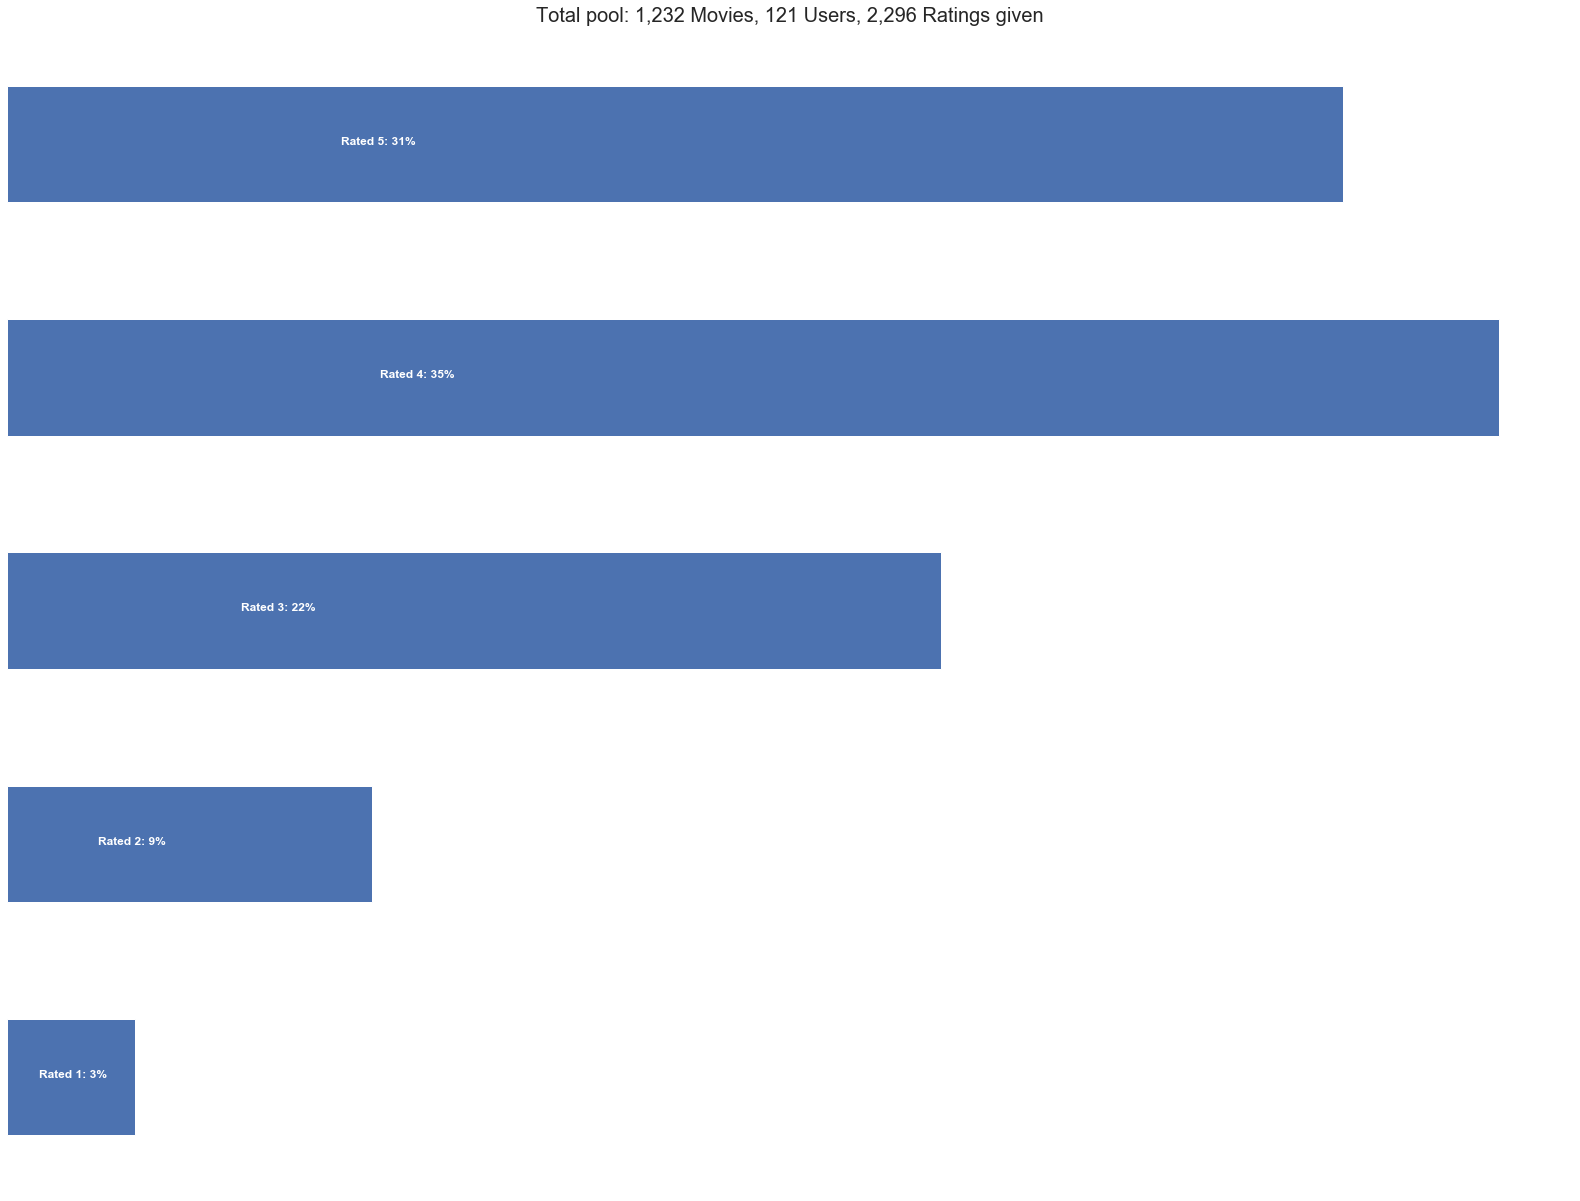

In [215]:
#See the distribution of the ratings given by the users

print("See Overview of the Data")
p = df_Movie.groupby('rating')['itemID'].agg(['count'])

# get movie count
movie_count = len(df_Movie['itemID'].unique()) 

# get user count
cust_count = len(df_Movie['userID'].unique())

# get rating count
rating_count = df_Movie['rating'].count() 

ax = p.plot(kind = 'barh', legend = False, figsize = (25,20))
plt.title('Total pool: {:,} Movies, {:,} Users, {:,} Ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rated {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')
    

In [216]:
#check The sparsity level
sparsity=round(1.0-len(df_Movie)/float(n_users*n_items),4)
print( 'The sparsity level of our data base is : ' +  str(sparsity*100) + '%' )

The sparsity level of our data base is : 98.46000000000001%


"""
The percentage of sparsity is high, so we can now confirm that the Model Based models matrix factorization will be the most accurate. 
most effective models for reducing zero values.
"""

In [217]:
#select the feature Y on dataset

feature = df_Movie.drop(['rating'], axis=1,)   
feature.head(5)

,userID,itemID,age,sex,city,country,time,daytype,season,location,...,movieCountry,movieLanguage,movieYear,genre1,genre2,genre3,actor1,actor2,actor3,budget
0,23,14,33,1,20,2,3,2,2,1,...,36,9,2007,7,0,0,1303,1524,1656,9000000
1,21,5,28,1,10,3,2,2,2,1,...,37,9,1998,7,6,10,1636,1539,1402,90000000
2,21,6,28,1,10,3,4,2,2,1,...,37,9,2008,7,10,18,1373,1510,1691,24000000
3,22,13,28,1,20,2,3,2,3,2,...,37,9,2010,1,14,19,1382,57,1109,60000000
4,21,7,28,1,10,3,4,2,2,1,...,37,9,2003,3,10,18,98,385,1827,35000000


In [218]:
#select the target X on dataset

target = df_Movie['rating']

In [219]:
columnfeature = feature.columns   #feature columns
columnfeature



Index(['userID', 'itemID', 'age', 'sex', 'city', 'country', 'time', 'daytype',
       'season', 'location', 'weather', 'social', 'endEmo', 'dominantEmo',
       'mood', 'physical', 'decision', 'interaction', 'director',
       'movieCountry', 'movieLanguage', 'movieYear', 'genre1', 'genre2',
       'genre3', 'actor1', 'actor2', 'actor3', 'budget'],
      dtype='object')

In [220]:
# Calculate statistics of age maximum and minimum
print('age minimum:', df_Movie['age'].min())
print('age Mean:', df_Movie['age'].mean())

age minimum: 0
age Mean: 25.818815331010452


In [221]:
# Drop duplicates values if there exist
df_Movie.drop_duplicates()

,userID,itemID,rating,age,sex,city,country,time,daytype,season,...,movieCountry,movieLanguage,movieYear,genre1,genre2,genre3,actor1,actor2,actor3,budget
0,23,14,5,33,1,20,2,3,2,2,...,36,9,2007,7,0,0,1303,1524,1656,9000000
1,21,5,3,28,1,10,3,2,2,2,...,37,9,1998,7,6,10,1636,1539,1402,90000000
2,21,6,4,28,1,10,3,4,2,2,...,37,9,2008,7,10,18,1373,1510,1691,24000000
3,22,13,4,28,1,20,2,3,2,3,...,37,9,2010,1,14,19,1382,57,1109,60000000
4,21,7,3,28,1,10,3,4,2,2,...,37,9,2003,3,10,18,98,385,1827,35000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,31,4324,4,30,2,20,2,2,2,2,...,36,9,2011,1,3,8,1623,1008,1458,125000000
2292,61,177,5,28,1,20,2,4,3,2,...,37,9,1979,1,3,21,1340,826,467,0
2293,125,177,5,23,2,3,5,4,3,2,...,37,9,1979,1,3,21,1340,826,467,0
2294,21,4288,2,28,1,10,3,2,2,2,...,37,9,2012,1,10,19,895,1002,1179,78000000


In [222]:
n_users=len(df_Movie['userID'].unique())  #still the same value
n_users

121

# Standardization (to standardize the data over the same interval).

In [223]:

from sklearn import preprocessing
# Create feature #feature

# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(feature)

# Show feature 
standardized 


array([[-0.74511466, -1.63059703,  0.34116111, ...,  0.97597325,
         1.1580621 , -0.69261224],
       [-0.77720649, -1.63591415,  0.10362293, ...,  1.00232493,
         0.71737949,  0.8002298 ],
       [-0.77720649, -1.63532336,  0.10362293, ...,  0.95137835,
         1.21878608, -0.41616001],
       ...,
       [ 0.89156857, -1.53429821, -0.13391525, ..., -0.25025834,
        -0.90481831, -0.85848358],
       [-0.77720649,  0.89444088,  0.10362293, ...,  0.05893473,
         0.33048098,  0.57906801],
       [ 2.81707827,  0.64749052,  0.29365347, ..., -0.77026486,
        -1.39234514, -0.48988061]])

In [224]:
# Print mean and standard deviation  all the values are between 0 and 1 intervalle

print("Mean:", round(standardized.mean()))
print("Standard deviation:", standardized.std())

Mean: 0.0
Standard deviation: 1.0


# Reducing Features on Sparse Data using 
# Matrix Factorization Truncated Singular Value Decomposition TSVD

In [225]:
# Load libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np


# Standardize feature matrix
featuresTSVD = StandardScaler().fit_transform(feature) #feature is a data who content the feature off all the data, feature helps to predict the rating target

# Make sparse matrix
features_sparse = csr_matrix(featuresTSVD)

# Create a TSVD
tsvd = TruncatedSVD(n_components=24,  n_iter=7, random_state=42)
#n_components=24, n_iter=7, random_state=100

# Conduct TSVD on sparse matrix
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# Show results
print("Original number of features:", features_sparse.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1])

Original number of features: 29
Reduced number of features: 24


In [226]:
principalSVD = pd.DataFrame(data = featuresTSVD)
#principalSVD
                           
np.cumsum(tsvd.explained_variance_ratio_)

array([0.10125988, 0.18188288, 0.25119575, 0.31124515, 0.35893978,
       0.40435246, 0.44496237, 0.48449579, 0.52263923, 0.55902554,
       0.59420699, 0.62661995, 0.65774011, 0.6879242 , 0.71795221,
       0.74632631, 0.77399494, 0.80132319, 0.8268913 , 0.8502997 ,
       0.87285883, 0.89512776, 0.9162332 , 0.93656501])

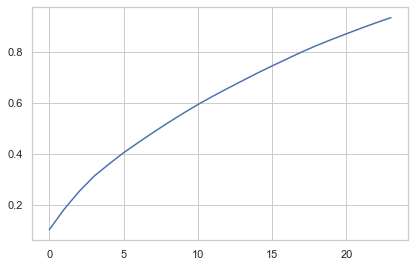

In [227]:
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))

In [228]:
finalDfTSVD = pd.concat([principalSVD, target], axis = 1)  #combine the principalSVD reduce data with target

In [229]:
finalDfTSVD

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,rating
0,-0.745115,-1.630597,0.341161,-0.986159,0.987542,-0.842190,0.221562,0.552831,-0.555168,-0.263081,...,-0.204388,0.277334,0.368317,-1.565706,-1.229884,0.503252,0.975973,1.158062,-0.692612,5
1,-0.777206,-1.635914,0.103623,-0.986159,-0.524963,0.105687,-0.772005,0.552831,-0.555168,-0.263081,...,-0.204388,-0.601627,0.368317,-0.598739,-0.032795,1.075263,1.002325,0.717379,0.800230,3
2,-0.777206,-1.635323,0.103623,-0.986159,-0.524963,0.105687,1.215130,0.552831,-0.555168,-0.263081,...,-0.204388,0.374996,0.368317,0.045906,0.924877,0.623495,0.951378,1.218786,-0.416160,4
3,-0.761161,-1.631188,0.103623,-0.986159,0.987542,-0.842190,0.221562,0.552831,0.259836,1.414793,...,-0.204388,0.570321,-1.174852,0.690551,1.044586,0.638955,-1.601221,0.209033,0.247325,4
4,-0.777206,-1.634733,0.103623,-0.986159,-0.524963,0.105687,1.215130,0.552831,-0.555168,-0.263081,...,-0.204388,-0.113316,-0.660462,0.045906,0.924877,-1.566637,-1.024998,1.454742,-0.213428,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,-0.616747,0.915709,0.198638,1.014036,0.987542,-0.842190,-0.772005,0.552831,-0.555168,-0.263081,...,-0.204388,0.667983,-1.174852,-1.082223,-0.272213,1.052932,0.069475,0.814538,1.445285,4
2292,-0.135370,-1.534298,0.103623,-0.986159,0.987542,-0.842190,1.215130,1.935511,-0.555168,3.092668,...,-0.204388,-2.457212,-1.174852,-1.082223,1.284004,0.566809,-0.250258,-0.904818,-0.858484,5
2293,0.891569,-1.534298,-0.133915,1.014036,-1.583717,2.001439,1.215130,1.935511,-0.555168,-0.263081,...,-0.204388,-2.457212,-1.174852,-1.082223,1.284004,0.566809,-0.250258,-0.904818,-0.858484,5
2294,-0.777206,0.894441,0.103623,-0.986159,-0.524963,0.105687,-0.772005,0.552831,-0.555168,1.414793,...,-0.204388,0.765646,-1.174852,0.045906,1.044586,-0.197590,0.058935,0.330481,0.579068,2


In [230]:
finalDfTarget =  finalDfTSVD['rating']   #target variable, just keep the dataset containing the userID and rating to evaluate the prediction.
finalDfTarget   

0       5
1       3
2       4
3       4
4       3
       ..
2291    4
2292    5
2293    5
2294    2
2295    5
Name: rating, Length: 2296, dtype: int64

In [231]:
finalDfFeature =  finalDfTSVD.drop(['rating'], axis = 1 )   #feature
finalDfFeature   



,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.745115,-1.630597,0.341161,-0.986159,0.987542,-0.842190,0.221562,0.552831,-0.555168,-0.263081,...,0.244065,-0.204388,0.277334,0.368317,-1.565706,-1.229884,0.503252,0.975973,1.158062,-0.692612
1,-0.777206,-1.635914,0.103623,-0.986159,-0.524963,0.105687,-0.772005,0.552831,-0.555168,-0.263081,...,0.372562,-0.204388,-0.601627,0.368317,-0.598739,-0.032795,1.075263,1.002325,0.717379,0.800230
2,-0.777206,-1.635323,0.103623,-0.986159,-0.524963,0.105687,1.215130,0.552831,-0.555168,-0.263081,...,0.372562,-0.204388,0.374996,0.368317,0.045906,0.924877,0.623495,0.951378,1.218786,-0.416160
3,-0.761161,-1.631188,0.103623,-0.986159,0.987542,-0.842190,0.221562,0.552831,0.259836,1.414793,...,0.372562,-0.204388,0.570321,-1.174852,0.690551,1.044586,0.638955,-1.601221,0.209033,0.247325
4,-0.777206,-1.634733,0.103623,-0.986159,-0.524963,0.105687,1.215130,0.552831,-0.555168,-0.263081,...,0.372562,-0.204388,-0.113316,-0.660462,0.045906,0.924877,-1.566637,-1.024998,1.454742,-0.213428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,-0.616747,0.915709,0.198638,1.014036,0.987542,-0.842190,-0.772005,0.552831,-0.555168,-0.263081,...,0.244065,-0.204388,0.667983,-1.174852,-1.082223,-0.272213,1.052932,0.069475,0.814538,1.445285
2292,-0.135370,-1.534298,0.103623,-0.986159,0.987542,-0.842190,1.215130,1.935511,-0.555168,3.092668,...,0.372562,-0.204388,-2.457212,-1.174852,-1.082223,1.284004,0.566809,-0.250258,-0.904818,-0.858484
2293,0.891569,-1.534298,-0.133915,1.014036,-1.583717,2.001439,1.215130,1.935511,-0.555168,-0.263081,...,0.372562,-0.204388,-2.457212,-1.174852,-1.082223,1.284004,0.566809,-0.250258,-0.904818,-0.858484
2294,-0.777206,0.894441,0.103623,-0.986159,-0.524963,0.105687,-0.772005,0.552831,-0.555168,1.414793,...,0.372562,-0.204388,0.765646,-1.174852,0.045906,1.044586,-0.197590,0.058935,0.330481,0.579068


In [232]:
# Sampling dataset ( Spliting) train data  80% and test data 20%

In [233]:
X_Train, X_Test, y_Train, y_Test = train_test_split(finalDfFeature, finalDfTarget, test_size=0.2, random_state =50)

# ---Training the Models with TSVD with KNN, LR,NB --- 

# Models with Matrix Factorization____TSVD____

# ____________TSVD_________KNN modeles________________


In [234]:
from sklearn.neighbors import KNeighborsRegressor   #mport the KNN library from sklearn
knn = KNeighborsRegressor(n_neighbors=10, weights = "distance") #select the K neighbors equal to 10
knn.fit(X_Train, y_Train)   #train the data on X_train and ytrain
preKnnTSVD = knn.predict(X_Test)  #predict the rating on the new data X_Test
preKnnTSVD   #result of rating prediction


array([4.39825693, 3.80084797, 3.80169174, 3.60381608, 3.45521388,
       3.67717418, 4.19727051, 4.1627707 , 3.26282892, 3.8004039 ,
       4.50779759, 3.2619873 , 3.60572571, 3.68764718, 3.81750099,
       4.42861879, 3.09599746, 4.53602614, 3.71326337, 4.19208066,
       3.72243234, 3.7055871 , 3.29752085, 3.18927596, 4.45607293,
       2.97150104, 4.18061026, 2.7964215 , 4.42692138, 3.75875402,
       3.69461061, 4.31104343, 3.79327174, 4.4867607 , 4.10246025,
       4.50764379, 4.11021517, 4.14617814, 3.67581587, 4.29752243,
       3.56247976, 3.88987438, 4.08689464, 4.53228823, 4.0168141 ,
       4.50411499, 4.59317335, 4.30619256, 4.43342369, 2.90120118,
       4.30106995, 3.17963045, 3.53345579, 3.61877614, 3.24735654,
       3.28172836, 4.30297317, 3.96488632, 3.0336021 , 4.16042572,
       4.302715  , 4.09565188, 4.18821372, 3.7135749 , 4.00845748,
       4.11002027, 3.67459708, 3.92282799, 4.1203077 , 3.88011671,
       3.48303242, 3.44286618, 4.60912232, 4.26509945, 3.57860

In [235]:
from sklearn import metrics   #import metrics from slearn to evaluate the prediction of rating

print("KNN model performance:")
print("Mean absolute error(MAE) =", round(metrics.mean_absolute_error(y_Test, preKnnTSVD), 5))  #MAE error
print("Mean squared error(MSE) =", round(metrics.mean_squared_error(y_Test, preKnnTSVD), 4))    #MSE error
print("Median absolute error =", round(metrics.median_absolute_error(y_Test, preKnnTSVD), 4))    #Median Absolute Error error
print("Explain variance score =", round(metrics.explained_variance_score(y_Test, preKnnTSVD), 4))  
print("R2 score =", round(metrics.r2_score(y_Test, preKnnTSVD), 4))


print("Root Mean squared error(RMSE) =", round(np.sqrt(metrics.mean_squared_error(y_Test, preKnnTSVD)), 5))  #Root Mean Square Error RMSE

KNN model performance:
Mean absolute error(MAE) = 0.72648
Mean squared error(MSE) = 0.8271
Median absolute error = 0.5963
Explain variance score = 0.2685
R2 score = 0.2667
Root Mean squared error(RMSE) = 0.90944


# _______TSVD__________Naive Bayesian Regression_______

In [239]:
from sklearn import linear_model    #import the linear regressian from sklearn model
gnb = linear_model.BayesianRidge()  #instantiation of bayesian regression model
gnb.fit(X_Train, y_Train)   #training data

# Predict
predictionNaiveTSVD = gnb.predict(X_Test)

predictionNaiveTSVD

array([4.27171959, 3.94122132, 3.35934699, 4.29382665, 3.64733964,
       3.97995939, 4.16186945, 4.44575062, 3.08463515, 3.1484372 ,
       3.76576151, 3.60720369, 3.7048676 , 3.8784258 , 3.52403179,
       4.38510074, 3.09128496, 4.23204248, 3.30684942, 4.20244085,
       4.13409528, 3.92093049, 3.40318365, 3.20227841, 4.52345491,
       3.28791787, 4.02847756, 3.02541027, 4.24180883, 3.61835331,
       3.36336372, 4.1985016 , 4.17697714, 4.473475  , 4.33302045,
       4.06555153, 4.11231055, 4.29226484, 3.70351172, 4.19796756,
       3.55825128, 4.30996625, 4.10780532, 4.00150548, 3.50811441,
       4.93266316, 4.20391056, 3.74534504, 3.91712739, 3.58904645,
       4.50897472, 3.37481376, 3.44064901, 3.51507347, 3.78240824,
       3.2055762 , 4.23963777, 4.2603783 , 3.92109858, 3.76478511,
       3.88591232, 4.32142697, 4.38911235, 4.25279421, 3.25244693,
       4.22432309, 4.02352741, 3.55893095, 3.97039184, 4.31565279,
       3.56753105, 4.72258687, 4.73617613, 4.62483229, 3.33557

In [240]:
print("naive bayesion model performance:")
print("Mean absolute error(MAE) =", round(metrics.mean_absolute_error(y_Test, predictionNaiveTSVD), 6))
print("Mean squared error(MSE) =", round(metrics.mean_squared_error(y_Test, predictionNaiveTSVD), 4))
print("Median absolute error =", round(metrics.median_absolute_error(y_Test, predictionNaiveTSVD), 4))
print("Explain variance score =", round(metrics.explained_variance_score(y_Test, predictionNaiveTSVD), 4))
print("R2 score =", round(metrics.r2_score(y_Test, predictionNaiveTSVD), 4))

print("Root Mean squared error(RMSE) =", round(np.sqrt(metrics.mean_squared_error(y_Test, predictionNaiveTSVD)), 6))

naive bayesion model performance:
Mean absolute error(MAE) = 0.727872
Mean squared error(MSE) = 0.8483
Median absolute error = 0.6153
Explain variance score = 0.2492
R2 score = 0.2479
Root Mean squared error(RMSE) = 0.921046


# _______TSVD__________Linear_Regression_______

In [242]:
#Regression Model

import sklearn.metrics as sm
#import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
reg_linearDP = LinearRegression()
reg_linearDP.fit(X_Train, y_Train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
regressionPredictionDPCA = reg_linearDP.predict(X_Test)
regressionPredictionDPCA

array([4.27247877, 3.93701776, 3.30995164, 4.33826115, 3.60653263,
       3.96466384, 4.1752419 , 4.49005713, 3.041445  , 3.11665321,
       3.73595334, 3.6388755 , 3.71559561, 3.85137638, 3.5116062 ,
       4.42088891, 3.05544401, 4.25365159, 3.30951585, 4.18982248,
       4.15542503, 3.90634949, 3.38373722, 3.17560346, 4.57374431,
       3.25544108, 4.03866549, 2.97464833, 4.22365384, 3.62377037,
       3.3176381 , 4.21996348, 4.20769792, 4.51552407, 4.36226881,
       4.06792766, 4.14507117, 4.27866378, 3.69179952, 4.208686  ,
       3.55860629, 4.3062706 , 4.12185486, 4.01134033, 3.49384112,
       4.98604259, 4.22802508, 3.73353396, 3.93783434, 3.57792211,
       4.53534066, 3.34885968, 3.44778368, 3.50526292, 3.80011263,
       3.15712992, 4.22960587, 4.28006366, 3.97805108, 3.75893428,
       3.90203376, 4.34618142, 4.42014325, 4.2392588 , 3.22107322,
       4.21120798, 4.04061595, 3.52900231, 4.00315501, 4.29422751,
       3.58233992, 4.7783237 , 4.79264915, 4.67446595, 3.33524

In [244]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_Test, regressionPredictionDPCA), 6))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_Test, regressionPredictionDPCA), 4))
print("Median absolute error =", round(sm.median_absolute_error(y_Test, regressionPredictionDPCA), 4))
print("Explain variance score =", round(sm.explained_variance_score(y_Test, regressionPredictionDPCA), 4))
print("R2 score =", round(sm.r2_score(y_Test, regressionPredictionDPCA), 7))

print("Root Mean squared error(RMSE) =", round(np.sqrt(metrics.mean_squared_error(y_Test, regressionPredictionDPCA)), 6))


Regressor model performance:
Mean absolute error(MAE) = 0.725147
Mean squared error(MSE) = 0.8452
Median absolute error = 0.613
Explain variance score = 0.252
R2 score = 0.2506638
Root Mean squared error(RMSE) = 0.919326


# Matrix Factorization PCA   Principal Composants Analyses

In [257]:


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# Standardize the feature matrix
featuresPCA = StandardScaler().fit_transform(feature)
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=25, whiten=True)
# Conduct PCA
features_pca = pca.fit_transform(featuresPCA)
# Show results
print("Original number of features:", featuresPCA.shape[1])
print("Reduced number of features:", features_pca.shape[1])





Original number of features: 29
Reduced number of features: 25


In [258]:
principalPCA = pd.DataFrame(data = features_pca )
principalPCA

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.024293,1.190986,0.041571,0.488480,-0.636802,0.572127,-0.665032,-0.478684,-0.007786,0.046935,...,1.530317,-2.033750,1.224047,0.772072,-0.614084,1.092958,0.311595,-0.463123,0.906972,0.494058
1,-0.757480,0.173474,-0.158580,1.382287,1.485509,0.257320,-0.209088,-1.436239,0.621798,-0.814919,...,1.847814,-0.482292,1.149327,0.745364,1.976988,0.287486,-0.429543,0.728713,-0.635451,-1.437284
2,-0.171463,-0.017259,0.225493,1.323132,0.516973,0.679119,-2.199877,0.414239,-0.919097,0.120018,...,1.017356,-0.840632,1.130197,-0.039331,0.672046,0.191777,0.043406,-1.201927,1.685770,0.089078
3,-0.443133,0.692951,-0.694895,1.545341,-0.171314,0.537464,-1.520648,0.377335,-0.312466,-1.612810,...,-0.433329,0.116311,-0.353301,0.106995,-0.659584,-0.411066,0.485987,0.337377,-0.389951,0.440078
4,-0.227185,-0.293625,-0.289170,1.005451,0.879346,1.189694,-1.108027,0.293557,0.124139,-0.852725,...,0.907445,0.372438,1.088233,0.148017,0.188566,0.132683,-0.360137,-0.806340,1.370249,-0.828883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,0.397513,1.002018,-1.375325,-0.049218,-0.733370,-0.488464,0.111983,0.283731,1.057008,-0.497497,...,-0.363476,-1.011250,0.100913,-0.900988,0.314155,-0.230894,-0.982004,-0.249736,-0.544894,-0.062831
2292,-0.948293,0.693897,-0.083322,2.507648,1.935864,1.864115,-0.175799,-0.383927,1.454204,-0.152758,...,-0.897146,-1.417630,-0.380812,0.114994,-3.330346,-0.432834,0.629204,-0.446240,-0.618514,0.082575
2293,0.295138,-1.092471,0.325861,2.073843,2.308513,0.569185,0.937856,-0.824255,0.904632,-0.029028,...,-0.436788,-0.929579,0.871000,0.641399,-0.212754,-0.690196,-0.146853,-1.889842,3.010488,-0.768694
2294,0.486102,-0.048390,-0.835400,0.517928,-0.214557,0.342257,-0.775211,0.716737,0.360071,-0.167083,...,-0.481598,-0.574614,-0.066374,0.182342,-0.139100,-0.824832,0.691309,-0.480541,-2.337995,-0.322839


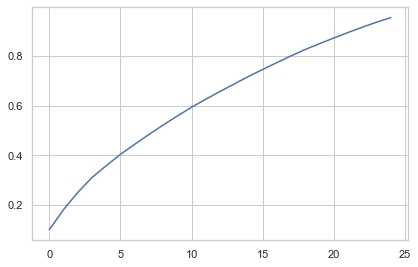

In [259]:
np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [260]:
finalPCA = pd.concat([principalPCA, target], axis = 1)
finalPCA

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,rating
0,-0.024293,1.190986,0.041571,0.488480,-0.636802,0.572127,-0.665032,-0.478684,-0.007786,0.046935,...,-2.033750,1.224047,0.772072,-0.614084,1.092958,0.311595,-0.463123,0.906972,0.494058,5
1,-0.757480,0.173474,-0.158580,1.382287,1.485509,0.257320,-0.209088,-1.436239,0.621798,-0.814919,...,-0.482292,1.149327,0.745364,1.976988,0.287486,-0.429543,0.728713,-0.635451,-1.437284,3
2,-0.171463,-0.017259,0.225493,1.323132,0.516973,0.679119,-2.199877,0.414239,-0.919097,0.120018,...,-0.840632,1.130197,-0.039331,0.672046,0.191777,0.043406,-1.201927,1.685770,0.089078,4
3,-0.443133,0.692951,-0.694895,1.545341,-0.171314,0.537464,-1.520648,0.377335,-0.312466,-1.612810,...,0.116311,-0.353301,0.106995,-0.659584,-0.411066,0.485987,0.337377,-0.389951,0.440078,4
4,-0.227185,-0.293625,-0.289170,1.005451,0.879346,1.189694,-1.108027,0.293557,0.124139,-0.852725,...,0.372438,1.088233,0.148017,0.188566,0.132683,-0.360137,-0.806340,1.370249,-0.828883,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,0.397513,1.002018,-1.375325,-0.049218,-0.733370,-0.488464,0.111983,0.283731,1.057008,-0.497497,...,-1.011250,0.100913,-0.900988,0.314155,-0.230894,-0.982004,-0.249736,-0.544894,-0.062831,4
2292,-0.948293,0.693897,-0.083322,2.507648,1.935864,1.864115,-0.175799,-0.383927,1.454204,-0.152758,...,-1.417630,-0.380812,0.114994,-3.330346,-0.432834,0.629204,-0.446240,-0.618514,0.082575,5
2293,0.295138,-1.092471,0.325861,2.073843,2.308513,0.569185,0.937856,-0.824255,0.904632,-0.029028,...,-0.929579,0.871000,0.641399,-0.212754,-0.690196,-0.146853,-1.889842,3.010488,-0.768694,5
2294,0.486102,-0.048390,-0.835400,0.517928,-0.214557,0.342257,-0.775211,0.716737,0.360071,-0.167083,...,-0.574614,-0.066374,0.182342,-0.139100,-0.824832,0.691309,-0.480541,-2.337995,-0.322839,2


In [261]:
finalPCAFeature = finalPCA.drop(['rating'], axis = 1)

In [262]:
finalPCATarget = finalPCA['rating']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(finalPCAFeature, finalPCATarget, test_size=0.2, random_state =50)

In [264]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights = "distance")
knn.fit(X_train, y_train)
preKnnDPCA = knn.predict(X_test)
preKnnDPCA


array([4.11914429, 3.57888573, 3.53452487, 3.50279386, 3.93576731,
       3.29024414, 4.09741386, 4.41466566, 3.0813587 , 3.81283973,
       4.31290306, 3.73178569, 3.59890767, 3.76448338, 3.80508545,
       4.51462597, 3.0851816 , 4.63588984, 3.52927154, 4.00261922,
       3.71394121, 3.49141192, 3.67108905, 3.10656232, 4.53553132,
       3.64513686, 4.16354469, 2.80172543, 4.32874411, 3.74833967,
       3.67832637, 4.09363353, 3.96184089, 4.37780155, 4.35510783,
       4.58739388, 4.20946829, 4.23451353, 3.59271545, 4.18763791,
       2.47493968, 3.71585182, 4.08136402, 4.42530294, 4.01866455,
       4.49529949, 3.85528279, 4.31727987, 4.02672233, 3.00117761,
       3.99905286, 3.26714817, 3.88915653, 3.92309795, 3.50049857,
       3.50887016, 4.31115809, 3.87017424, 3.98912366, 4.15101932,
       4.2076065 , 4.08976217, 3.81235913, 3.21731169, 3.82139315,
       4.01347227, 3.59724405, 3.91595665, 3.91832579, 3.76846114,
       3.30090018, 3.52616701, 4.3315527 , 4.09729441, 3.28887

In [265]:
print("KNN model performance:")
print("Mean absolute error(MAE) =", round(metrics.mean_absolute_error(y_test, preKnnDPCA), 5))
print("Mean squared error(MSE) =", round(metrics.mean_squared_error(y_test, preKnnDPCA), 4))
print("Median absolute error =", round(metrics.median_absolute_error(y_test, preKnnDPCA), 4))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, preKnnDPCA), 4))
print("R2 score =", round(metrics.r2_score(y_test, preKnnDPCA), 4))


print("Root Mean squared error(RMSE) =", round(np.sqrt(metrics.mean_squared_error(y_test, preKnnDPCA)), 5))

KNN model performance:
Mean absolute error(MAE) = 0.74454
Mean squared error(MSE) = 0.8745
Median absolute error = 0.6416
Explain variance score = 0.2256
R2 score = 0.2246
Root Mean squared error(RMSE) = 0.93515


In [266]:
#______----PCA-----____NBC____

In [267]:
from sklearn import linear_model
gnb = linear_model.BayesianRidge()
gnb.fit(X_train, y_train)

# Predict
predictionNaiveDPCA = gnb.predict(X_test)

predictionNaiveDPCA





array([4.33725539, 3.86021082, 3.34474977, 4.25350122, 3.76199433,
       3.97705138, 4.20819977, 4.38274759, 3.1353431 , 3.14264476,
       3.90415637, 3.53605413, 3.66439981, 3.92269274, 3.50091903,
       4.3749016 , 3.07930678, 4.25849736, 3.22827882, 4.39664995,
       4.11040052, 3.97151388, 3.44879919, 3.28748202, 4.50240066,
       3.36563037, 4.09043659, 3.01989942, 4.29891017, 3.61785661,
       3.51729787, 4.16476108, 4.13387837, 4.47484991, 4.2807458 ,
       4.02583521, 4.11066202, 4.26383098, 3.73890273, 4.23420238,
       3.4292778 , 4.30968612, 4.10695857, 4.03584271, 3.65479311,
       4.94685829, 4.08630435, 3.84558766, 3.89816502, 3.59113816,
       4.54709472, 3.40015663, 3.41290488, 3.5518765 , 3.81243493,
       3.16080464, 4.31001114, 4.30054315, 3.77274958, 3.73743047,
       3.76826206, 4.31285791, 4.42999134, 4.32798456, 3.20999488,
       4.19478301, 4.00939951, 3.52365326, 3.93992663, 4.35831371,
       3.5542817 , 4.73298201, 4.73170712, 4.6529373 , 3.31345

In [268]:
print("naive bayesion model performance:")
print("Mean absolute error(MAE) =", round(metrics.mean_absolute_error(y_test, predictionNaiveDPCA), 6))
print("Mean squared error(MSE) =", round(metrics.mean_squared_error(y_test, predictionNaiveDPCA), 4))
print("Median absolute error =", round(metrics.median_absolute_error(y_test, predictionNaiveDPCA), 4))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, predictionNaiveDPCA), 4))
print("R2 score =", round(metrics.r2_score(y_test, predictionNaiveDPCA), 4))

print("Root Mean squared error(RMSE) =", round(np.sqrt(metrics.mean_squared_error(y_test, predictionNaiveDPCA)), 6))

naive bayesion model performance:
Mean absolute error(MAE) = 0.734951
Mean squared error(MSE) = 0.8552
Median absolute error = 0.6028
Explain variance score = 0.2431
R2 score = 0.2418
Root Mean squared error(RMSE) = 0.924746


In [269]:
#________------PCA-------_____Linear Regression____

In [270]:

#Regression Model

import sklearn.metrics as sm
#import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
reg_linearDP = LinearRegression()
reg_linearDP.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
regressionPredictionDPCA = reg_linearDP.predict(X_test)
regressionPredictionDPCA



array([4.36031826, 3.86275207, 3.32196105, 4.27344985, 3.75705764,
       3.98258135, 4.2263321 , 4.40941324, 3.10117436, 3.10833393,
       3.905762  , 3.5210399 , 3.6564681 , 3.92653353, 3.48425333,
       4.40089326, 3.0423196 , 4.27775124, 3.19967395, 4.42388734,
       4.12440971, 3.97766427, 3.43047223, 3.26126506, 4.53337821,
       3.3437681 , 4.10168214, 2.97860198, 4.32055823, 3.60840064,
       3.50163144, 4.17925729, 4.14784685, 4.5045569 , 4.30172441,
       4.03494668, 4.12190421, 4.28401481, 3.73510285, 4.25347406,
       3.40922526, 4.33306828, 4.11959157, 4.04502408, 3.64375503,
       5.00243801, 4.0980118 , 3.84647286, 3.90074162, 3.57689389,
       4.58213321, 3.37732839, 3.39188501, 3.53816677, 3.81007413,
       3.12940925, 4.33202175, 4.32211399, 3.76899507, 3.73128708,
       3.76522668, 4.33599423, 4.45776252, 4.35040065, 3.17803872,
       4.21218463, 4.01729293, 3.5082404 , 3.94257157, 4.38313362,
       3.54138019, 4.77615788, 4.7752105 , 4.69220617, 3.28826

In [272]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, regressionPredictionDPCA), 6))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, regressionPredictionDPCA), 4))
print("Median absolute error =", round(sm.median_absolute_error(y_test, regressionPredictionDPCA), 4))
print("Explain variance score =", round(sm.explained_variance_score(y_test, regressionPredictionDPCA), 4))
print("R2 score =", round(sm.r2_score(y_test, regressionPredictionDPCA), 7))

print("Root Mean squared error(RMSE) =", round(np.sqrt(metrics.mean_squared_error(y_test, regressionPredictionDPCA)), 6))


Regressor model performance:
Mean absolute error(MAE) = 0.733502
Mean squared error(MSE) = 0.853
Median absolute error = 0.6116
Explain variance score = 0.2449
R2 score = 0.2437282
Root Mean squared error(RMSE) = 0.92357


# Resultat des Modeles

In [273]:
dfModel = pd.read_csv("ml model nfa.csv")

#df.head()
dfModel

,Machine Learning Models,MAE,RMSE
0,TSVD - KNN Regressor ( K = 10 ),0.726480,0.909440
1,TSVD - Naive Baye Ridge,0.727872,0.921046
2,TSVD - Linear Regressor,0.725146,0.919326
3,BiasTF - RT (resultat de l'article ),0.749400,0.914100


In [274]:
print('Maximum of MAE:', dfModel['MAE'].max())
print('Minimum of MAE:', dfModel['MAE'].min())
print('Minimum of RMSE:', dfModel['RMSE'].min())
#print('Mean of rating:', df['r'].mean())
#print('Count the Rating:', df['rating'].count())
#print('Sum:', df['rating'].sum())


Maximum of MAE: 0.7494
Minimum of MAE: 0.725146
Minimum of RMSE: 0.9094399999999999
